In [45]:
import pandas as pd
import numpy as np

In [46]:
taxi_jan_2024 = pd.read_csv('data/yellow_tripdata_2024-01.csv')
taxi_data = pd.concat([taxi_jan_2024])

/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_1780/1023235160.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi_jan_2024 = pd.read_csv('data/yellow_tripdata_2024-01.csv')


In [47]:
print(taxi_data.shape)
taxi_data.head

(2964624, 19)


<bound method NDFrame.head of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1               1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2               1  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3               1  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4               1  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   
...           ...                  ...                   ...              ...   
2964619         2  2024-01-31 23:45:59   2024-01-31 23:54:36              NaN   
2964620         1  2024-01-31 23:13:07   2024-01-31 23:27:52              NaN   
2964621         2  2024-01-31 23:19:00   2024-01-31 23:38:00              NaN   
2964622         2  2024-01-31 23:07:23   2024-01-31 23:25:14              NaN   
2964623         1  2024-01-31 23:58:25   2024-02-01 00:13:30              NaN  

In [48]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [49]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 
       'PULocationID', 'DOLocationID', 'payment_type',
       'total_amount']]

In [50]:
taxi_data.head

<bound method NDFrame.head of         tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0        2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1        2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2        2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3        2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4        2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   
...                      ...                   ...              ...   
2964619  2024-01-31 23:45:59   2024-01-31 23:54:36              NaN   
2964620  2024-01-31 23:13:07   2024-01-31 23:27:52              NaN   
2964621  2024-01-31 23:19:00   2024-01-31 23:38:00              NaN   
2964622  2024-01-31 23:07:23   2024-01-31 23:25:14              NaN   
2964623  2024-01-31 23:58:25   2024-02-01 00:13:30              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 1.72         1.0   

In [51]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

In [52]:
taxi_data['passenger_count'] = taxi_data['passenger_count'].fillna(0)
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype(int)

/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_1780/4196241516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['passenger_count'] = taxi_data['passenger_count'].fillna(0)
/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_1780/4196241516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['passenger_count'] = taxi_data['passenger_count'].astype(int)


<Axes: xlabel='index', ylabel='total_amount'>

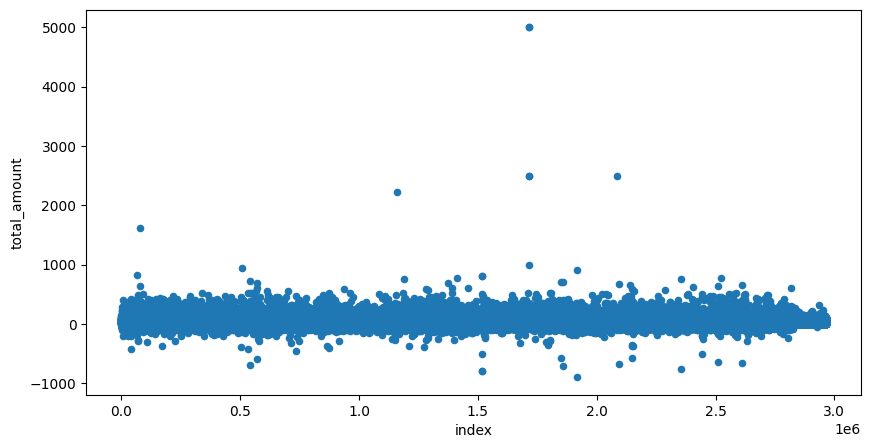

In [53]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [54]:
print(taxi_data[taxi_data['total_amount']<0].shape)

(35504, 9)


In [55]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1,2.16,1.0,249,232,4,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1,0.01,5.0,63,63,2,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1,0.47,1.0,249,113,4,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1,5.48,1.0,107,61,2,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1,8.74,1.0,90,225,4,-52.80


In [56]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

In [57]:
taxi_data = taxi_data[taxi_data['payment_type'] != 0]

In [58]:
taxi_data['payment_type'].value_counts()

payment_type
1    2319046
2     439191
4      46628
3      19597
Name: count, dtype: int64

In [59]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(405, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
854,2024-01-01 00:27:42,2024-01-01 00:28:49,1,0.2,1.0,239,143,4,0.0
29224,2024-01-01 10:01:27,2024-01-01 10:01:27,1,0.0,5.0,239,264,2,0.0
39191,2024-01-01 13:46:41,2024-01-01 14:12:06,1,0.0,99.0,42,216,1,0.0
39591,2024-01-01 13:03:22,2024-01-01 13:03:24,1,0.0,1.0,264,264,2,0.0
39592,2024-01-01 13:05:28,2024-01-01 13:05:35,1,0.0,1.0,193,193,2,0.0


In [60]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    129
4    128
3     83
2     65
Name: count, dtype: int64

In [61]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     282
0.10      20
0.90       8
0.20       7
0.50       7
1.60       6
1.00       5
0.80       5
0.70       5
0.60       4
0.30       4
1.30       4
3.00       3
1.10       3
0.40       3
1.80       2
2.50       2
10.70      2
1.70       2
2.40       2
3.40       2
3.30       1
3.80       1
15.00      1
5.30       1
18.40      1
12.10      1
2.90       1
1.74       1
12.80      1
1.40       1
25.10      1
4.20       1
2.70       1
3.50       1
4.00       1
21.90      1
16.50      1
26.20      1
13.60      1
7.70       1
3.60       1
5.50       1
5.80       1
4.90       1
8.10       1
1.20       1
17.10      1
Name: count, dtype: int64

In [62]:
taxi_data['total_amount'].mean()

np.float64(26.850621339568377)

In [63]:
taxi_data['RatecodeID'] = taxi_data['RatecodeID'].astype(int)

/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_1780/2763619415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['RatecodeID'] = taxi_data['RatecodeID'].astype(int)


In [64]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]
taxi_data_filtered

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1,211,148,1,16.10
...,...,...,...,...,...,...,...,...,...
2824457,2024-01-31 23:10:28,2024-01-31 23:18:30,1,3.51,1,138,129,1,30.31
2824458,2024-01-31 23:01:04,2024-01-31 23:17:35,1,3.36,1,162,261,1,29.25
2824459,2024-01-31 23:08:13,2024-01-31 23:25:00,3,3.30,1,43,249,1,23.70
2824460,2024-01-31 23:49:46,2024-01-31 23:53:10,0,0.40,1,142,163,2,10.10


In [65]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [66]:
taxi_data_prepared = taxi_data_filtered.copy()

In [67]:
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [74]:
taxi_data_prepared['tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'], errors='coerce')
taxi_data_prepared['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared['tpep_dropoff_datetime'], errors='coerce')

In [75]:
taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [76]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [78]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [79]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1,211,148,1,16.10,2024-01-01,2024,1,1,0


In [82]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [83]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2786954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,186,2024-01-01,1,1,0,1.72,22.70
1,140,2024-01-01,1,1,0,1.80,18.75
2,236,2024-01-01,1,1,0,4.70,31.30
3,79,2024-01-01,1,1,0,1.40,17.00
4,211,2024-01-01,1,1,0,0.80,16.10


In [87]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).agg(
    total_amount=('total_amount', 'mean'), 
    count_of_transactions=('total_amount', 'count')
).reset_index()
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(71954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,109.200000,1
1,1,2024-01-01,1,1,6,76.000000,3
2,1,2024-01-01,1,1,13,108.983333,3
3,1,2024-01-01,1,1,14,85.680000,6
4,1,2024-01-01,1,1,15,145.620000,2


<Axes: >

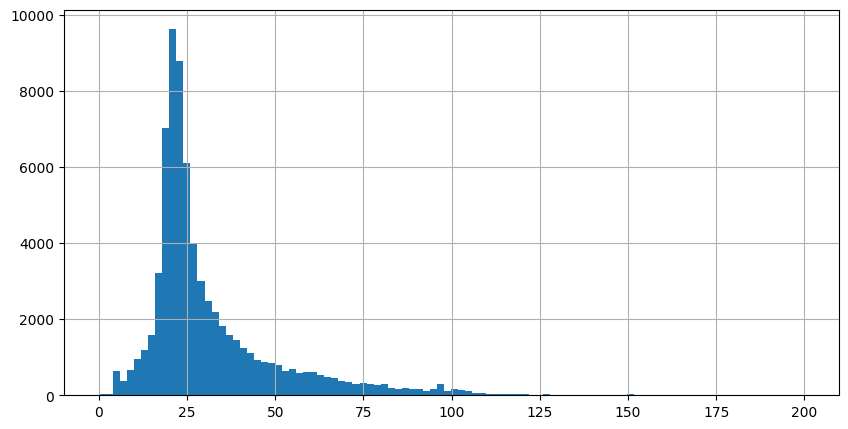

In [88]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))